### Regression models for Taxiride dataset

In [389]:
# Required modules
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR

import warnings
warnings.filterwarnings('ignore')
import os
os.chdir(r'D:\Datasets\Datasets-main')

In [390]:
df = pd.read_csv("TaxiFare.csv")
df.head()

,unique_id,amount,date_time_of_pickup,longitude_of_pickup,latitude_of_pickup,longitude_of_dropoff,latitude_of_dropoff,no_of_passenger
0,26:21.0,4.5,2009-06-15 17:26:21 UTC,-73.844311,40.721319,-73.841610,40.712278,1
1,52:16.0,16.9,2010-01-05 16:52:16 UTC,-74.016048,40.711303,-73.979268,40.782004,1
2,35:00.0,5.7,2011-08-18 00:35:00 UTC,-73.982738,40.761270,-73.991242,40.750562,2
3,30:42.0,7.7,2012-04-21 04:30:42 UTC,-73.987130,40.733143,-73.991567,40.758092,1
4,51:00.0,5.3,2010-03-09 07:51:00 UTC,-73.968095,40.768008,-73.956655,40.783762,1


In [391]:
df.shape

(50000, 8)

In [392]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 8 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   unique_id             50000 non-null  object 
 1   amount                50000 non-null  float64
 2   date_time_of_pickup   50000 non-null  object 
 3   longitude_of_pickup   50000 non-null  float64
 4   latitude_of_pickup    50000 non-null  float64
 5   longitude_of_dropoff  50000 non-null  float64
 6   latitude_of_dropoff   50000 non-null  float64
 7   no_of_passenger       50000 non-null  int64  
dtypes: float64(5), int64(1), object(2)
memory usage: 3.1+ MB


##### Removing unique_id because it is irrelevant to the model and does not provide any information.

In [393]:
df = df.drop("unique_id",axis=1)

##### Date and time may have some important data/relations hidden

In [394]:
df['Year'] = df['date_time_of_pickup'].str[:4]
df['Month'] = df['date_time_of_pickup'].str[5:7]
df['Hour'] = df['date_time_of_pickup'].str[11:13]
df.head()

,amount,date_time_of_pickup,longitude_of_pickup,latitude_of_pickup,longitude_of_dropoff,latitude_of_dropoff,no_of_passenger,Year,Month,Hour
0,4.5,2009-06-15 17:26:21 UTC,-73.844311,40.721319,-73.841610,40.712278,1,2009,06,17
1,16.9,2010-01-05 16:52:16 UTC,-74.016048,40.711303,-73.979268,40.782004,1,2010,01,16
2,5.7,2011-08-18 00:35:00 UTC,-73.982738,40.761270,-73.991242,40.750562,2,2011,08,00
3,7.7,2012-04-21 04:30:42 UTC,-73.987130,40.733143,-73.991567,40.758092,1,2012,04,04
4,5.3,2010-03-09 07:51:00 UTC,-73.968095,40.768008,-73.956655,40.783762,1,2010,03,07


In [395]:
df = df.drop("date_time_of_pickup",axis=1)

In [396]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 9 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   amount                50000 non-null  float64
 1   longitude_of_pickup   50000 non-null  float64
 2   latitude_of_pickup    50000 non-null  float64
 3   longitude_of_dropoff  50000 non-null  float64
 4   latitude_of_dropoff   50000 non-null  float64
 5   no_of_passenger       50000 non-null  int64  
 6   Year                  50000 non-null  object 
 7   Month                 50000 non-null  object 
 8   Hour                  50000 non-null  object 
dtypes: float64(5), int64(1), object(3)
memory usage: 3.4+ MB


In [397]:
df['Year']=df['Year'].astype(int)
df['Month']=df['Month'].astype(int)
df['Hour']=df['Hour'].astype(int)

In [398]:
#Important relation:
df['Long_displace'] = df['longitude_of_dropoff']-df['longitude_of_pickup']
df['Lat_displace'] = df['latitude_of_dropoff']-df['latitude_of_pickup']
df['displacement'] =((df['Long_displace'])**2+(df['Lat_displace'])**2)**0.5

In [399]:
df.describe()

,amount,longitude_of_pickup,latitude_of_pickup,longitude_of_dropoff,latitude_of_dropoff,no_of_passenger,Year,Month,Hour,Long_displace,Lat_displace,displacement
count,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000
mean,11.364171,-72.509756,39.933759,-72.504616,39.926251,1.667840,2011.739260,6.273300,13.489080,0.005140,-0.007508,0.191223
std,9.685557,10.393860,6.224857,10.407570,6.014737,1.289195,1.862639,3.461157,6.506935,3.080769,2.328407,3.856959
min,-5.000000,-75.423848,-74.006893,-84.654241,-74.006377,0.000000,2009.000000,1.000000,0.000000,-74.010230,-360.304405,0.000000
25%,6.000000,-73.992062,40.734880,-73.991152,40.734372,1.000000,2010.000000,3.000000,9.000000,-0.011221,-0.013650,0.012472
50%,8.500000,-73.981840,40.752678,-73.980082,40.753372,1.000000,2012.000000,6.000000,14.000000,0.000607,0.000000,0.021498
75%,12.500000,-73.967148,40.767360,-73.963584,40.768167,2.000000,2013.000000,9.000000,19.000000,0.013765,0.014196,0.038675
max,200.000000,40.783472,401.083332,40.851027,43.415190,6.000000,2015.000000,12.000000,23.000000,74.014917,40.796543,360.304405


##### There are many incorrect/invalid data present in the data set that needs to be filtered.
##### eg., 0 passengers, 0 displacement, non positive amount....

In [400]:
df2 = df.copy()

In [401]:
df2 = df2[df2['no_of_passenger'] > 0]
df2 = df2[df2['amount'] > 0]
df2 = df2[df2['displacement'] > 0]

In [402]:
df2.shape

(48380, 12)

In [403]:
df2.isnull().sum()

amount                  0
longitude_of_pickup     0
latitude_of_pickup      0
longitude_of_dropoff    0
latitude_of_dropoff     0
no_of_passenger         0
Year                    0
Month                   0
Hour                    0
Long_displace           0
Lat_displace            0
displacement            0
dtype: int64

In [404]:
#Location coordinates do not associate to taxi fare amount, rather distnce travelled by taxi
df2.drop(['latitude_of_dropoff','latitude_of_pickup','longitude_of_dropoff','longitude_of_pickup'],axis = 1,inplace = True)
df2.head()

,amount,no_of_passenger,Year,Month,Hour,Long_displace,Lat_displace,displacement
0,4.5,1,2009,6,17,0.002701,-0.009041,0.009436
1,16.9,1,2010,1,16,0.036780,0.070701,0.079696
2,5.7,2,2011,8,0,-0.008504,-0.010708,0.013674
3,7.7,1,2012,4,4,-0.004437,0.024949,0.025340
4,5.3,1,2010,3,7,0.011440,0.015754,0.019470


In [405]:
corr = df2.corr()
corr

,amount,no_of_passenger,Year,Month,Hour,Long_displace,Lat_displace,displacement
amount,1.000000,0.017187,0.123720,0.026842,-0.022608,-0.004287,0.004644,0.015346
no_of_passenger,0.017187,1.000000,0.006136,0.006468,0.011673,0.002596,-0.001211,-0.004101
Year,0.123720,0.006136,1.000000,-0.115351,0.005097,0.003025,-0.000905,0.020044
Month,0.026842,0.006468,-0.115351,1.000000,-0.001030,0.004418,-0.003739,-0.009588
Hour,-0.022608,0.011673,0.005097,-0.001030,1.000000,0.000799,0.001582,-0.000453
Long_displace,-0.004287,0.002596,0.003025,0.004418,0.000799,1.000000,-0.649468,0.009997
Lat_displace,0.004644,-0.001211,-0.000905,-0.003739,0.001582,-0.649468,1.000000,-0.284835
displacement,0.015346,-0.004101,0.020044,-0.009588,-0.000453,0.009997,-0.284835,1.000000


<Axes: >

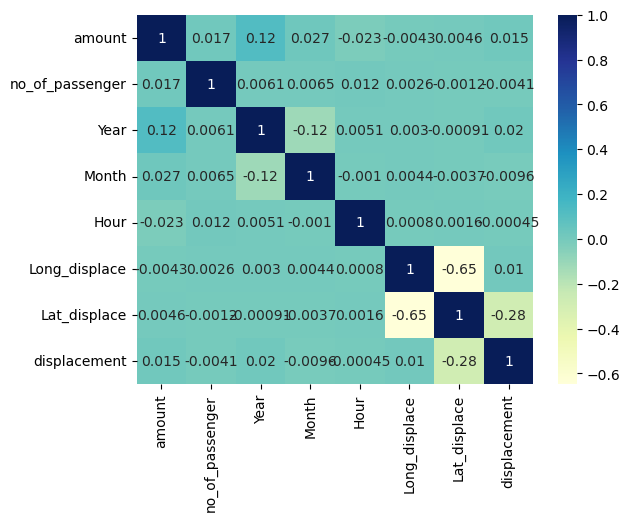

In [406]:
sns.heatmap(corr,annot=True,cmap="YlGnBu")

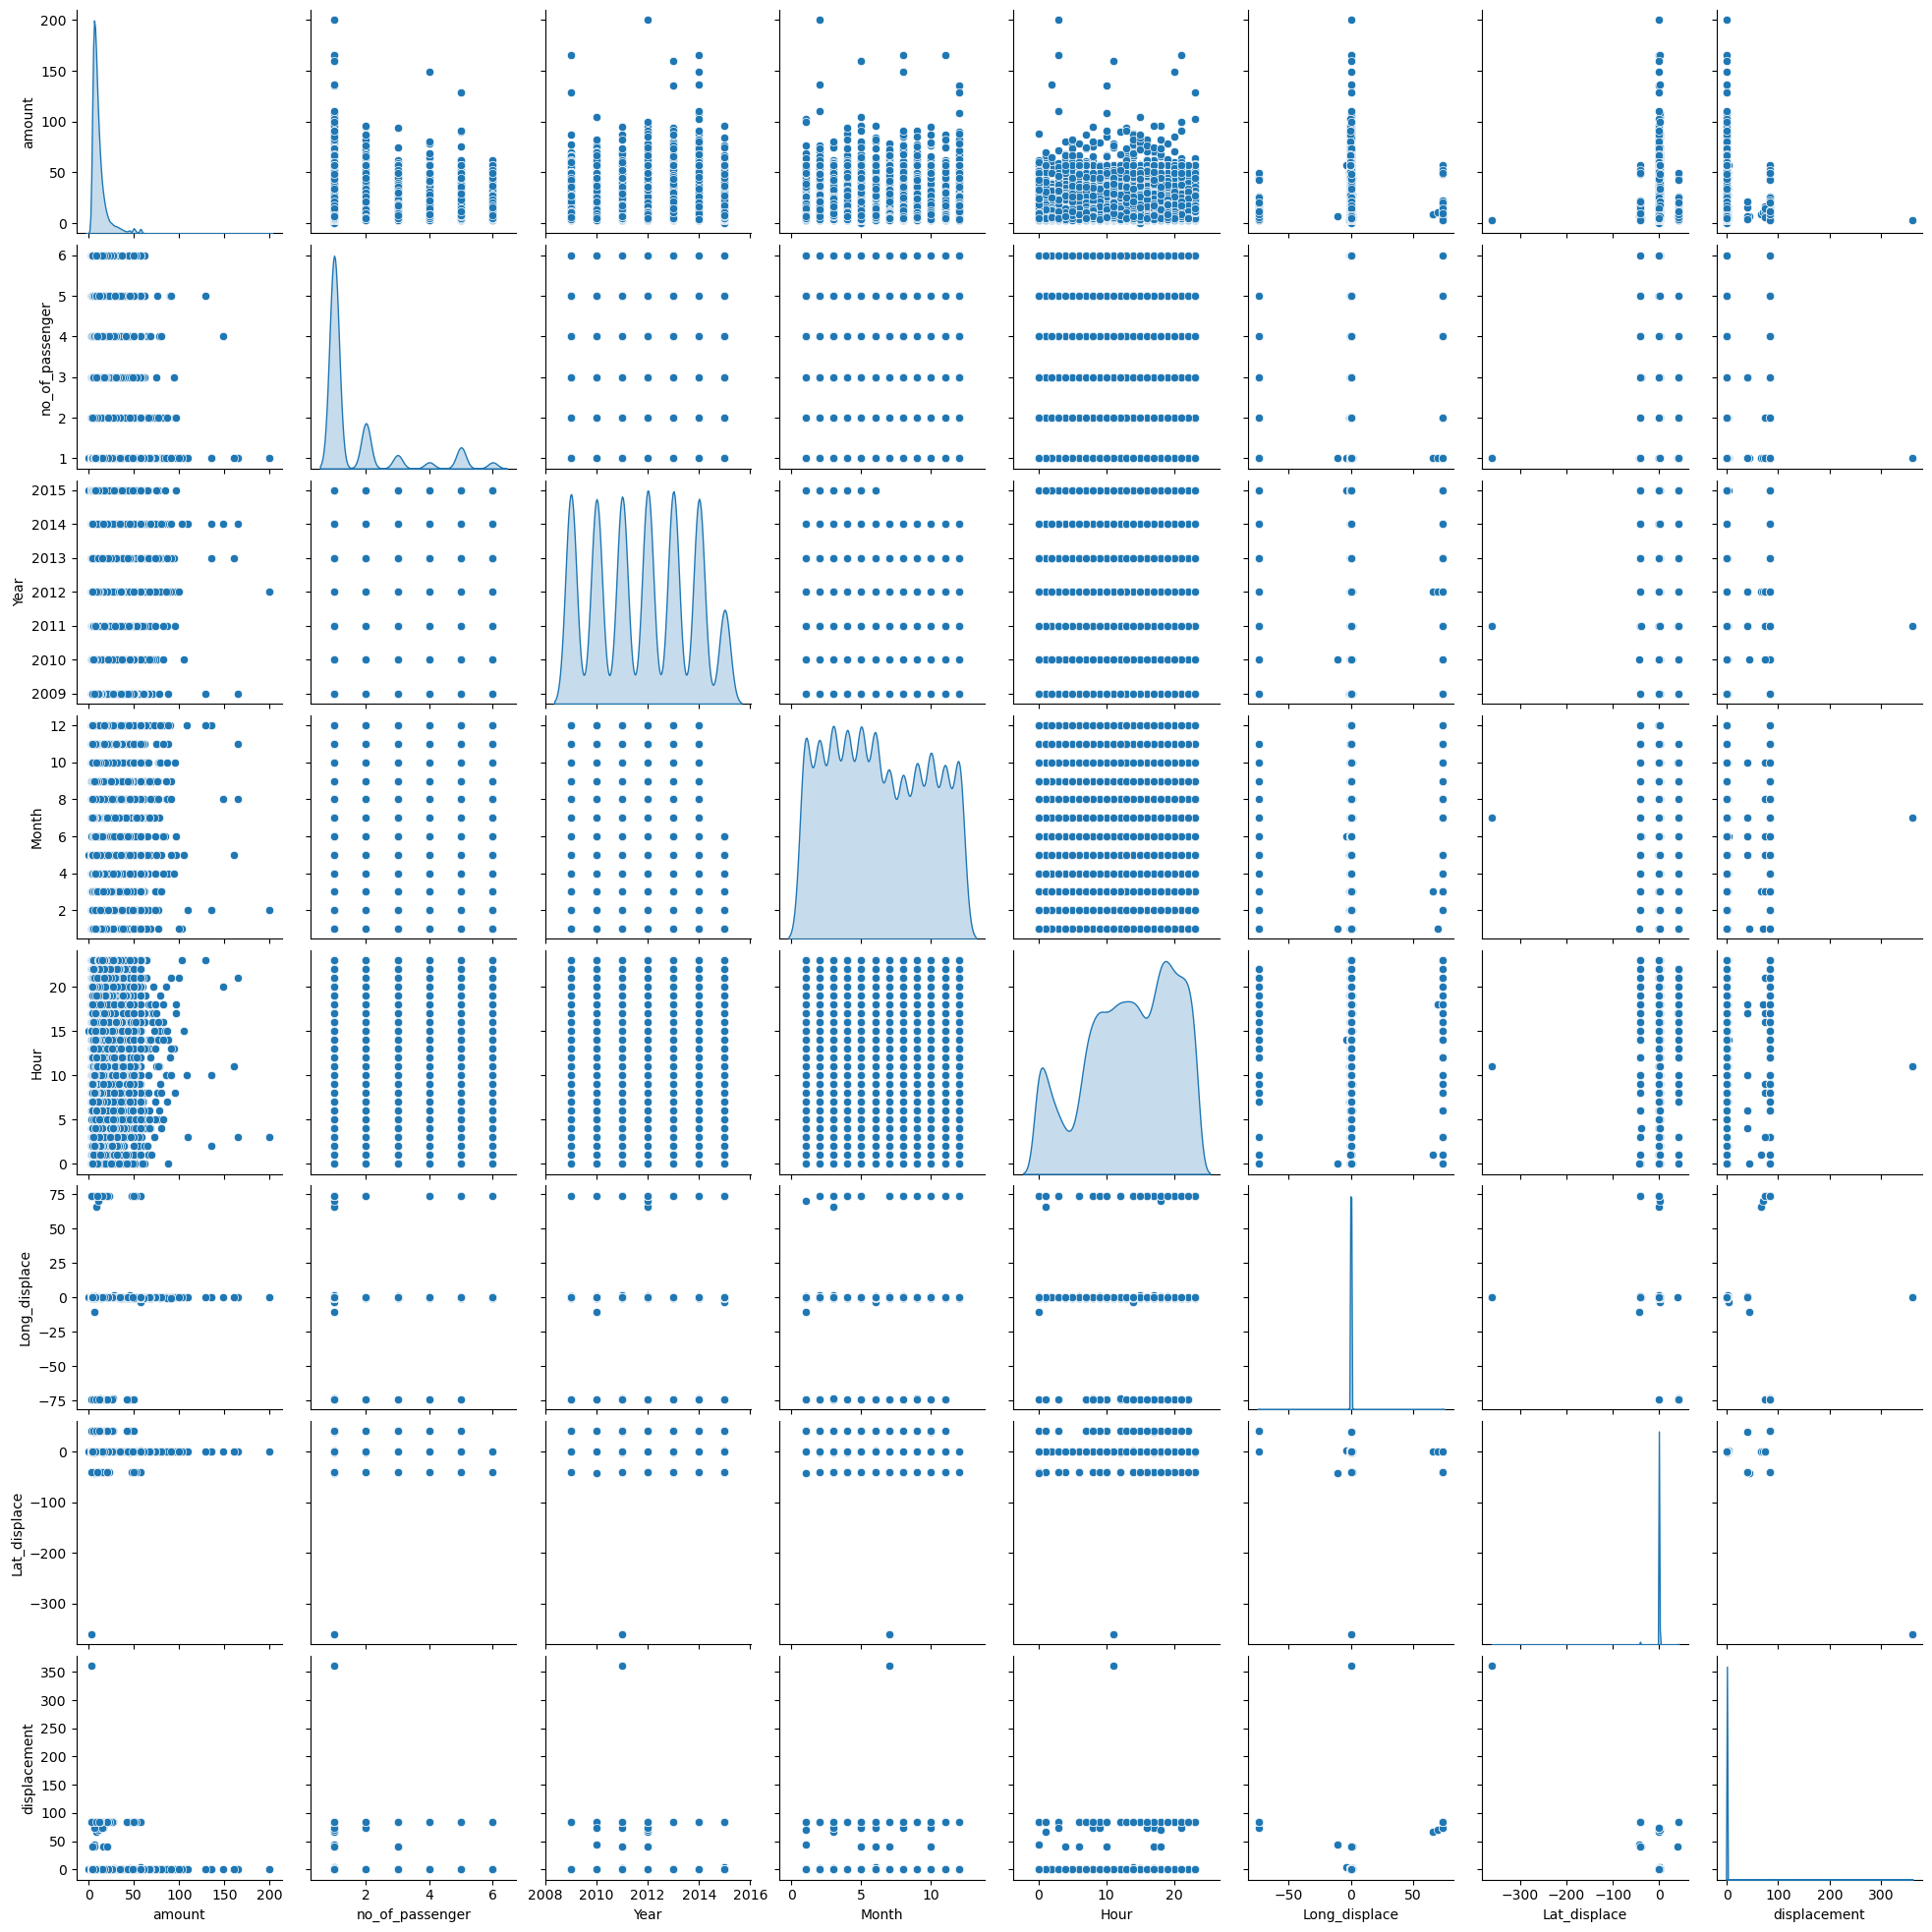

In [407]:
sns.pairplot(data=df2,diag_kind='kde')

#### Filtering the outliers

In [408]:
stats_df = df2.describe()
stats_df.loc['iqr'] = stats_df.loc['75%'] - stats_df.loc['25%']
stats_df.loc['u-bound'] = stats_df.loc['75%'] + 1.5*stats_df.loc['iqr']
stats_df.loc['l-bound'] = stats_df.loc['25%'] - 1.5*stats_df.loc['iqr']
out_fields = ['mean','25%','50%','75%', 'iqr', 'l-bound','min', 'u-bound','max']
stats_df = stats_df.loc[out_fields]
stats_df.rename({'50%': 'median'}, inplace=True)
stats_df

,amount,no_of_passenger,Year,Month,Hour,Long_displace,Lat_displace,displacement
mean,11.37401,1.675982,2011.746486,6.276023,13.484498,0.003770,-0.006920,1.887960e-01
25%,6.00000,1.000000,2010.000000,3.000000,9.000000,-0.011700,-0.014190,1.316020e-02
median,8.50000,1.000000,2012.000000,6.000000,14.000000,0.001399,0.000200,2.215196e-02
75%,12.50000,2.000000,2013.000000,9.000000,19.000000,0.014240,0.014731,3.961990e-02
iqr,6.50000,1.000000,3.000000,6.000000,10.000000,0.025940,0.028921,2.645970e-02
l-bound,-3.75000,-0.500000,2005.500000,-6.000000,-6.000000,-0.050610,-0.057572,-2.652934e-02
min,0.01000,1.000000,2009.000000,1.000000,0.000000,-74.010230,-360.304405,1.000000e-06
u-bound,22.25000,3.500000,2017.500000,18.000000,34.000000,0.053150,0.058113,7.930945e-02
max,200.00000,6.000000,2015.000000,12.000000,23.000000,74.014917,40.796543,3.603044e+02


In [409]:
#df3 => outliers dropped
amx = stats_df['amount'].loc['u-bound']
amn = stats_df['amount'].loc['l-bound']
pmx = stats_df['no_of_passenger'].loc['u-bound']
pmn = stats_df['no_of_passenger'].loc['l-bound']
lomx = stats_df['Long_displace'].loc['u-bound']
lomn = stats_df['Long_displace'].loc['l-bound']
lamx = stats_df['Lat_displace'].loc['u-bound']
lamn = stats_df['Lat_displace'].loc['l-bound']
dmx = stats_df['displacement'].loc['u-bound']
dmn = stats_df['displacement'].loc['l-bound']

df3 = df2[df2['amount'] >= amn]
df3 = df2[df2['amount'] <= amx]
df3 = df2[df2['Lat_displace'] >= lamn]
df3 = df2[df2['Lat_displace'] <= lamx]
df3 = df2[df2['Long_displace'] >= lomn]
df3 = df2[df2['Long_displace'] <= lomx]
df3 = df2[df2['displacement'] >= dmn]
df3 = df2[df2['displacement'] <= dmx]

In [410]:
df3.shape

(44154, 8)

In [411]:
corr2 = df3.corr()
corr2

,amount,no_of_passenger,Year,Month,Hour,Long_displace,Lat_displace,displacement
amount,1.000000,0.012726,0.154941,0.028599,-0.006132,0.055674,-0.040556,0.652721
no_of_passenger,0.012726,1.000000,0.005691,0.007487,0.011292,-0.000029,-0.002055,0.008555
Year,0.154941,0.005691,1.000000,-0.113329,0.005747,0.008381,0.003728,0.020100
Month,0.028599,0.007487,-0.113329,1.000000,-0.000631,0.003415,0.004945,0.001782
Hour,-0.006132,0.011292,0.005747,-0.000631,1.000000,-0.026017,-0.017370,-0.027729
Long_displace,0.055674,-0.000029,0.008381,0.003415,-0.026017,1.000000,0.491053,0.135055
Lat_displace,-0.040556,-0.002055,0.003728,0.004945,-0.017370,0.491053,1.000000,-0.005056
displacement,0.652721,0.008555,0.020100,0.001782,-0.027729,0.135055,-0.005056,1.000000


<Axes: >

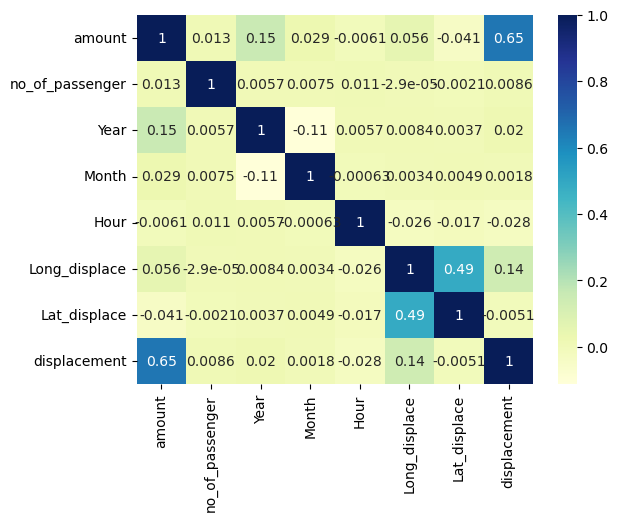

In [412]:
sns.heatmap(corr2,annot=True,cmap="YlGnBu")

In [413]:
#df4 => outliers replaced by mean
df4 = df2.copy()
df4['amount'] = df4['amount'].replace([df4['amount']>amx],np.mean)
df4['no_of_passenger'] = df4['no_of_passenger'].replace([df4['no_of_passenger']>pmx],np.mean)
df4['Long_displace'] = df4['Long_displace'].replace([df4['Long_displace']>lomx],np.mean)
df4['Long_displace'] = df4['Long_displace'].replace([df4['Long_displace']<lomn],np.mean)
df4['Lat_displace'] = df4['Lat_displace'].replace([df4['Lat_displace']>lamx],np.mean)
df4['Lat_displace'] = df4['Lat_displace'].replace([df4['Lat_displace']<lamn],np.mean)
df4['displacement'] = df4['displacement'].replace([df4['displacement']>dmx],np.mean)
df4['displacement'] = df4['displacement'].replace([df4['displacement']<dmn],np.mean)

In [414]:
df4.shape

(48380, 8)

In [415]:
corr3 = df4.corr()
corr3

,amount,no_of_passenger,Year,Month,Hour,Long_displace,Lat_displace,displacement
amount,1.000000,0.017187,0.123720,0.026842,-0.022608,-0.004287,0.004644,0.015346
no_of_passenger,0.017187,1.000000,0.006136,0.006468,0.011673,0.002596,-0.001211,-0.004101
Year,0.123720,0.006136,1.000000,-0.115351,0.005097,0.003025,-0.000905,0.020044
Month,0.026842,0.006468,-0.115351,1.000000,-0.001030,0.004418,-0.003739,-0.009588
Hour,-0.022608,0.011673,0.005097,-0.001030,1.000000,0.000799,0.001582,-0.000453
Long_displace,-0.004287,0.002596,0.003025,0.004418,0.000799,1.000000,-0.649468,0.009997
Lat_displace,0.004644,-0.001211,-0.000905,-0.003739,0.001582,-0.649468,1.000000,-0.284835
displacement,0.015346,-0.004101,0.020044,-0.009588,-0.000453,0.009997,-0.284835,1.000000


<Axes: >

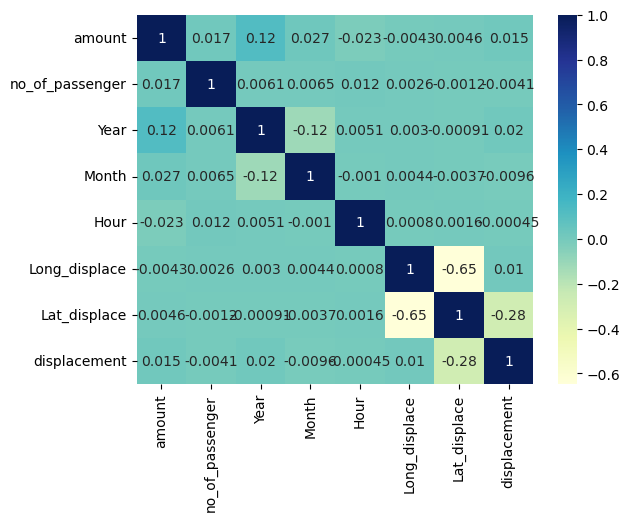

In [416]:
sns.heatmap(corr3,annot=True,cmap="YlGnBu")

In [417]:
#df5 => outliers replaced by median
df5 = df2.copy()
df5['amount'] = df5['amount'].replace([df5['amount']>amx],np.median)
df5['no_of_passenger'] = df5['no_of_passenger'].replace([df5['no_of_passenger']>pmx],np.median)
df5['Long_displace'] = df5['Long_displace'].replace([df5['Long_displace']>lomx],np.median)
df5['Long_displace'] = df5['Long_displace'].replace([df5['Long_displace']<lomn],np.median)
df5['Lat_displace'] = df5['Lat_displace'].replace([df5['Lat_displace']>lamx],np.median)
df5['Lat_displace'] = df5['Lat_displace'].replace([df5['Lat_displace']<lamn],np.median)
df5['displacement'] = df5['displacement'].replace([df5['displacement']>dmx],np.median)
df5['displacement'] = df5['displacement'].replace([df5['displacement']<dmn],np.median)

In [418]:
df5.shape

(48380, 8)

In [419]:
corr4 = df4.corr()
corr4

,amount,no_of_passenger,Year,Month,Hour,Long_displace,Lat_displace,displacement
amount,1.000000,0.017187,0.123720,0.026842,-0.022608,-0.004287,0.004644,0.015346
no_of_passenger,0.017187,1.000000,0.006136,0.006468,0.011673,0.002596,-0.001211,-0.004101
Year,0.123720,0.006136,1.000000,-0.115351,0.005097,0.003025,-0.000905,0.020044
Month,0.026842,0.006468,-0.115351,1.000000,-0.001030,0.004418,-0.003739,-0.009588
Hour,-0.022608,0.011673,0.005097,-0.001030,1.000000,0.000799,0.001582,-0.000453
Long_displace,-0.004287,0.002596,0.003025,0.004418,0.000799,1.000000,-0.649468,0.009997
Lat_displace,0.004644,-0.001211,-0.000905,-0.003739,0.001582,-0.649468,1.000000,-0.284835
displacement,0.015346,-0.004101,0.020044,-0.009588,-0.000453,0.009997,-0.284835,1.000000


<Axes: >

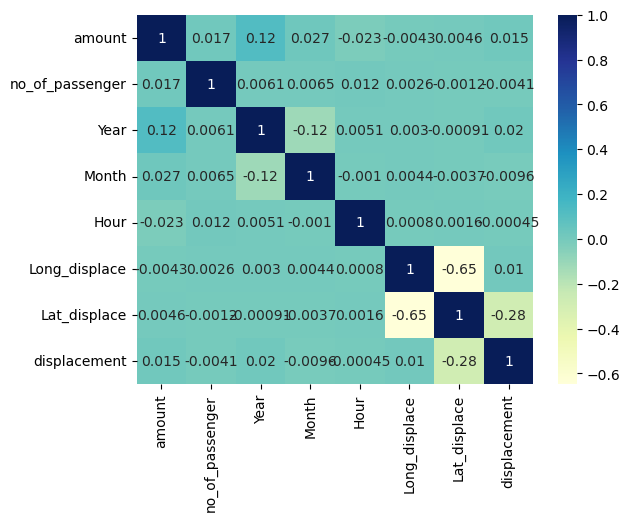

In [420]:
sns.heatmap(corr4,annot=True,cmap="YlGnBu")

##### Looking at the data df3,df4,df5, we can conclude removing the outliers gives the best possible co-relation set

##### Selecting df3 and splitting the data for model

In [421]:
x = df3.drop("amount",axis=1)
y = df3[['amount']]

In [422]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.30,random_state=1)

##### Fitting and testing score in different models

In [423]:
model_1 = LinearRegression()
model_1.fit(x_train,y_train)

LinearRegression()

In [424]:
model_1.score(x_train,y_train)

0.45332846999449183

In [425]:
model_1.score(x_test,y_test)

0.4420839761685753

In [426]:
model_2 = DecisionTreeRegressor(max_depth=5) # depth=5 is optimum choise
model_2.fit(x_train,y_train)

DecisionTreeRegressor(max_depth=5)

In [427]:
model_2.score(x_train,y_train)

0.5677590870320337

In [428]:
model_2.score(x_test,y_test)

0.4749493184854199

In [429]:
model_3 = AdaBoostRegressor(n_estimators=4) # n-estimators=4 is optimum 
model_3.fit(x_train,y_train)

AdaBoostRegressor(n_estimators=4)

In [430]:
model_3.score(x_train,y_train)

0.3440764584552305

In [431]:
model_3.score(x_test,y_test)

0.26891704051595733

In [432]:
model_4 = GradientBoostingRegressor(n_estimators=70) # n-estimators=70 is optimal
model_4.fit(x_train,y_train)

GradientBoostingRegressor(n_estimators=70)

In [433]:
model_4.score(x_train,y_train)

0.6429629436093549

In [434]:
model_4.score(x_test,y_test)

0.49134609580182054

In [435]:
model_5 = RandomForestRegressor()
model_5.fit(x_train,y_train)

RandomForestRegressor()

In [436]:
model_5.score(x_train,y_train)

0.9294788808877803

In [437]:
model_5.score(x_test,y_test)

0.480790664965264

## Fitting score results: For df3(removed outliers)
#### Linear Regression : Train(45%) Test(44%)
#### Decision Tree : Train(56%) Test(47%)
#### AdaBoost : Train(49%) Train(42%)
#### GradientBoosting : Train(64%) Test(50%)
#### Random Forest : Train(92%) Test(47%)

##### Selecting df5 and splitting the data for model

In [438]:
x = df5.drop("amount",axis=1)
y = df5[['amount']]

In [439]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.30,random_state=1)

##### Fitting and testing score in different models

In [440]:
model_1m = LinearRegression()
model_1m.fit(x_train,y_train)

LinearRegression()

In [441]:
model_1m.score(x_train,y_train)

0.01731738607651101

In [442]:
model_1m.score(x_test,y_test)

0.016797461544708514

In [443]:
model_2m = DecisionTreeRegressor(max_depth=7) # depth=7 is optimum choise
model_2m.fit(x_train,y_train)

DecisionTreeRegressor(max_depth=7)

In [444]:
model_2m.score(x_train,y_train)

0.8352237599236868

In [445]:
model_2m.score(x_test,y_test)

0.8168602252297776

In [446]:
model_3m = AdaBoostRegressor(n_estimators=6) # n-estimators=6 is optimum 
model_3m.fit(x_train,y_train)

AdaBoostRegressor(n_estimators=6)

In [447]:
model_3m.score(x_train,y_train)

0.657217524469603

In [448]:
model_3m.score(x_test,y_test)

0.6586649989146833

In [449]:
model_4m = GradientBoostingRegressor(n_estimators=100) # n-estimators=100 is optimal
model_4m.fit(x_train,y_train)

GradientBoostingRegressor()

In [450]:
model_4m.score(x_train,y_train)

0.8385132320954998

In [451]:
model_4m.score(x_test,y_test)

0.8400844914296806

In [452]:
model_5m = RandomForestRegressor()
model_5m.fit(x_train,y_train)

RandomForestRegressor()

In [453]:
model_5m.score(x_train,y_train)

0.9708015427318843

In [454]:
model_5m.score(x_test,y_test)

0.8385038039296797

## Fitting score results: For df5(outliers replaced by median)
#### Linear Regression : Train(01%) Test(01%)
#### Decision Tree : Train(83%) Test(81%)
#### AdaBoost : Train(70%) Train(72%)
#### GradientBoosting : Train(83%) Test(84%)
#### Random Forest : Train(96%) Test(83%)

### Therefore, the most optimal regression model for this problem is Gradient Boosting Regressor, when the outliers are replaced by median.